# Wavelet-Based Image Decomposition

## Introduction

In this notebook, we explore 2D Haar wavelet decomposition, a fundamental technique in multi-resolution image analysis. Wavelet transforms are widely used in image processing tasks such as compression, denoising, and feature extraction because they allow simultaneous localization in both space and frequency domains.

To gain a deeper understanding, we implement the decomposition in two ways:
- **Manual implementation** using basic convolution and downsampling operations.
- **Library-based implementation** using built-in wavelet functions for comparison.

We begin with a one-level 2D Haar wavelet decomposition, which splits the image into four subbands:
- **LL (Approximation)**: captures low-frequency content and general structure.
- **LH (Horizontal detail)**: emphasizes horizontal edges.
- **HL (Vertical detail)**: emphasizes vertical edges.
- **HH (Diagonal detail)**: highlights diagonal transitions and fine textures.

All four subbands are visualized and interpreted.

___

## Library-based implementation

In [1]:
import pywt
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
image = cv2.imread("/mnt/e/Term 4/HW/HW6/images/q2/image.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
coeffs2 = pywt.dwt2(image, "haar")
LL, (LH, HL, HH) = coeffs2

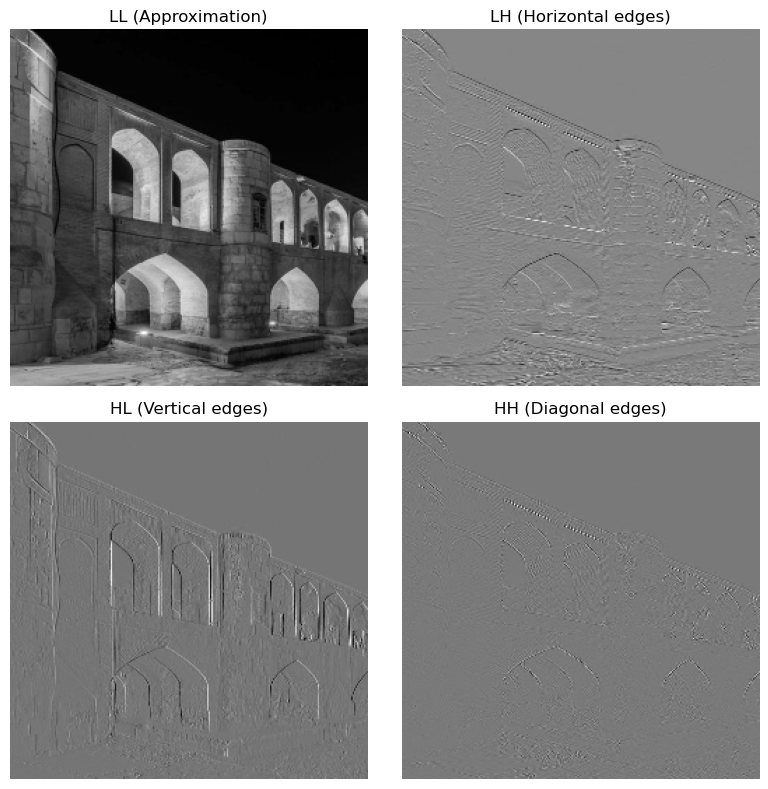

In [12]:
titles = ['LL (Approximation)', 'LH (Horizontal edges)', 'HL (Vertical edges)', 'HH (Diagonal edges)']
components = [LL, LH, HL, HH]

plt.figure(figsize=(8, 8))
for i, comp in enumerate(components):
    plt.subplot(2, 2, i + 1)
    plt.imshow(comp, cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


___

## Manual implementation

In [2]:
def convolve_rows(img, filt):
    result = []
    for row in img:
        conv = np.convolve(row, filt, mode='full')
        result.append(conv)
    return np.array(result)

In [3]:
def convolve_cols(img, filt):
    result = []
    for col in img.T:
        conv = np.convolve(col, filt)
        result.append(conv)

    return np.array(result).T

In [4]:
def downsample(img, axis):
    if axis == 0:
        return img[1::2, :]
    else:
        return img[:, 1::2]

In [5]:
h_low = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
h_high = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])

In [6]:
img = cv2.imread('/mnt/e/Term 4/HW/HW6/images/q2/image.png', cv2.IMREAD_GRAYSCALE).astype(float)


In [7]:
H = convolve_rows(img, h_high)
L = convolve_rows(img, h_low)

In [8]:
H_D = downsample(H, axis=1)
L_D = downsample(L, axis=1)

In [9]:
H_D_L = convolve_cols(H_D, h_low)
H_D_H = convolve_cols(H_D, h_high)

L_D_L = convolve_cols(L_D, h_low)
L_D_H = convolve_cols(L_D, h_high)

In [10]:
LL = downsample(L_D_L, axis=0)
LH = downsample(L_D_H, axis=0)
HL = downsample(H_D_L, axis=0)
HH = downsample(H_D_H, axis=0)

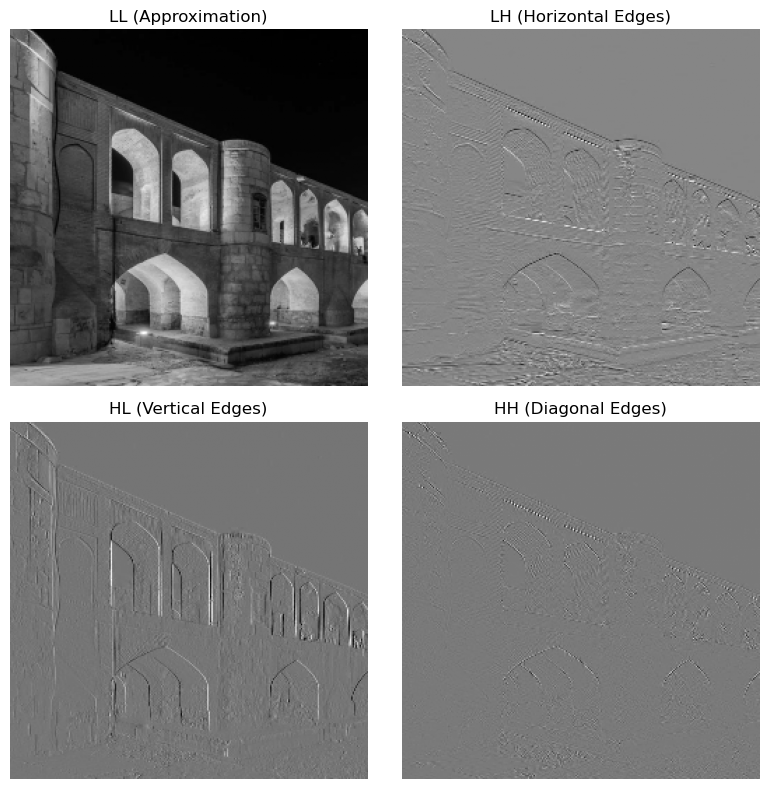

In [12]:
titles = ['LL (Approximation)', 'LH (Horizontal Edges)', 'HL (Vertical Edges)', 'HH (Diagonal Edges)']
subbands = [LL, LH, HL, HH]

plt.figure(figsize=(8, 8))
for i, band in enumerate(subbands):
    plt.subplot(2, 2, i + 1)
    plt.imshow(band, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Second-Level Decomposition (Level 2)

After performing the first-level 2D Haar wavelet decomposition, we obtain four subbands: LL, LH, HL, and HH. Among these, the **LL subband** contains the low-frequency approximation of the image and retains most of the significant structural information.

To analyze the image at a coarser resolution and extract broader patterns, we perform a **second-level decomposition** by applying the same Haar wavelet transform **only on the LL subband** from the first level.

In [13]:
coeffs2 = pywt.dwt2(LL, "haar")
LL2, (LH2, HL2, HH2) = coeffs2

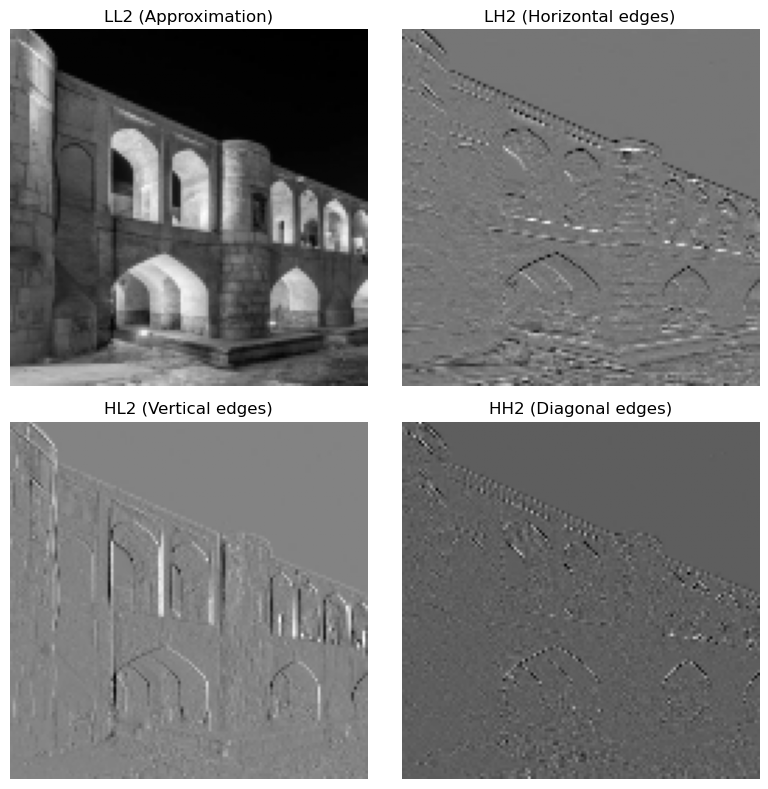

In [15]:
titles = ['LL2 (Approximation)', 'LH2 (Horizontal edges)', 'HL2 (Vertical edges)', 'HH2 (Diagonal edges)']
components = [LL2, LH2, HL2, HH2]

plt.figure(figsize=(8, 8))
for i, comp in enumerate(components):
    plt.subplot(2, 2, i + 1)
    plt.imshow(comp, cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


___

## Image Reconstruction

The image was manually reconstructed using the inverse Haar wavelet transform.  
This was done by upsampling and convolving the subbands (LL, LH, HL, HH) obtained from the first-level decomposition, and then summing them to recover the original image structure.


In [28]:
def upsample(img, axis):
    if axis == 0:
        upsampled = np.zeros((img.shape[0] * 2, img.shape[1]))
        upsampled[::2, :] = img
    else:
        upsampled = np.zeros((img.shape[0], img.shape[1] * 2))
        upsampled[:, ::2] = img
    return upsampled


In [29]:
h_low = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
h_high = np.array([1/np.sqrt(2), -1/np.sqrt(2)])

In [30]:
U1 = upsample(HH, axis=0)
U2 = upsample(HL, axis=0)
U3 = upsample(LH, axis=0)
U4 = upsample(LL, axis=0)

In [31]:
U1_H = convolve_cols(U1, h_high)
U2_L = convolve_cols(U2, h_low)
U3_H = convolve_cols(U3, h_high)
U4_L = convolve_cols(U4, h_low)

In [32]:
sum1 = U1_H + U2_L
sum2 = U3_H + U4_L

In [33]:
sum1_U = upsample(sum1, axis=1)
sum2_U = upsample(sum2, axis=1)

In [34]:
sum1_U_H = convolve_rows(sum1_U, h_high)
sum2_U_L = convolve_rows(sum2_U, h_low)

In [38]:
reconstructed_image = sum1_U_H + sum2_U_L

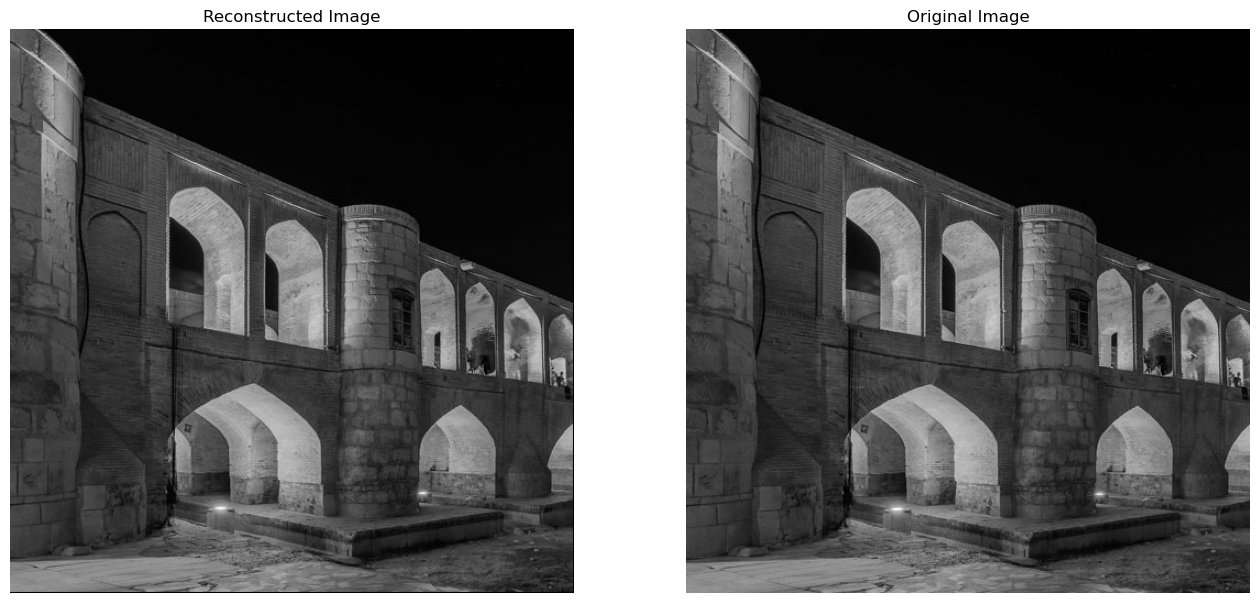

In [46]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis('off');